In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns; sns.set()
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Note: 2011-2013 represent top 100 billed services. 2014-2017 represent all billed services
data_2011= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
data_2012= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
data_2013= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
data_2014= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
data_2015= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"
data_2016= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv"
data_2017= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2017.csv"

# Read School and Student Data File and store into Pandas Data Frames
data_2011_df = pd.read_csv(data_2011, low_memory=False)
data_2012_df = pd.read_csv(data_2012, low_memory=False)
data_2013_df = pd.read_csv(data_2013, low_memory=False)
data_2014_df = pd.read_csv(data_2014, low_memory=False)
data_2015_df = pd.read_csv(data_2015, low_memory=False)
data_2016_df = pd.read_csv(data_2016, low_memory=False)
data_2017_df = pd.read_csv(data_2017, low_memory=False)

In [2]:
data_2016_df["Total Discharges"] = pd.to_numeric(data_2016_df["Total Discharges"], errors='coerce')
data_2016_df = data_2016_df.dropna()
data_2016_df["Total Discharges"] = data_2016_df["Total Discharges"].astype(int)
data_2016_df.head()


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,"$1,016,806.46","$296,937.00","$150,139.69"
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,26,"$443,387.54","$215,059.54","$163,889.31"
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,33,"$711,472.00","$180,315.55","$145,192.61"
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50025,UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR,200 WEST ARBOR DRIVE,SAN DIEGO,CA,92103,CA - San Diego,17,"$796,343.82","$299,244.41","$270,131.59"
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,CA,92123,CA - San Diego,13,"$1,434,651.46","$239,537.46","$215,205.00"


In [3]:
#add year
data_2011_year_df = data_2011_df['Payment Year'] = 2011
data_2012_year_df = data_2012_df['Payment Year'] = 2012
data_2013_year_df = data_2013_df['Payment Year'] = 2013
data_2014_year_df = data_2014_df['Payment Year'] = 2014
data_2015_year_df = data_2015_df['Payment Year'] = 2015
data_2016_year_df = data_2016_df['Payment Year'] = 2016
data_2017_year_df = data_2017_df['Payment Year'] = 2017
print(data_2017_year_df)


2017


In [4]:
income_2011 = "data_median_income/final_2011_median_income.csv"
income_2012 = "data_median_income/final_2012_median_income.csv"
income_2013 = "data_median_income/final_2013_median_income.csv"
income_2014 = "data_median_income/final_2014_median_income.csv"
income_2015 = "data_median_income/final_2015_median_income.csv"
income_2016 = "data_median_income/final_2016_median_income.csv"
income_2017 = "data_median_income/final_2017_median_income.csv"

income_2011_df = pd.read_csv(income_2011, low_memory=False)
income_2012_df = pd.read_csv(income_2012, low_memory=False)
income_2013_df = pd.read_csv(income_2013, low_memory=False)
income_2014_df = pd.read_csv(income_2014, low_memory=False)
income_2015_df = pd.read_csv(income_2015, low_memory=False)
income_2016_df = pd.read_csv(income_2016, low_memory=False)
income_2017_df = pd.read_csv(income_2017, low_memory=False)


In [5]:
final_data_df = data_2011_year_df
frames = [data_2011_df, data_2012_df,data_2013_df,data_2014_df,data_2015_df,data_2016_df,data_2017_df]
final_data_df = pd.concat(frames)

In [6]:
all_income_df = income_2011_df
income_frames = [income_2011_df, income_2012_df, income_2013_df, income_2014_df, income_2015_df, income_2016_df, income_2017_df]
all_income_df = pd.concat(income_frames)
all_income_df = all_income_df.rename(columns = {"Zip Code":"Provider Zip Code", "Year":"Payment Year"})

final_data_df = pd.merge(final_data_df, all_income_df, on=["Provider Zip Code", "Payment Year"])


In [7]:
# cleanup up floats
final_data_df['Provider Id'] = final_data_df['Provider Id'].astype(str).replace('\.0', '', regex=True)
final_data_df['Provider Zip Code'] = final_data_df['Provider Zip Code'].astype(str).replace('\.0', '', regex=True)

In [8]:
#final_data_df.to_csv('../final_data.csv', index=False)


In [9]:
final_data_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Payment Year,Median Income
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.1,5777.24,4763.74,2011,37710.0
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38.0,20312.8,4894.76,3865.5,2011,37710.0
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84.0,38820.4,10260.2,9167.08,2011,37710.0
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,169.0,27345.1,6542.09,5438.51,2011,37710.0
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33.0,17605.5,4596.39,3618.94,2011,37710.0


In [10]:
# 2011 top procedures performed
grouped_2011_df=data_2011_df.groupby(['DRG Definition'])
grouped_2011_counts_df=pd.DataFrame(grouped_2011_df[('Total Discharges')].sum())
grouped_2011_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,427207
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,319072
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",244854
292 - HEART FAILURE & SHOCK W CC,222038
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,206695
194 - SIMPLE PNEUMONIA & PLEURISY W CC,198390
291 - HEART FAILURE & SHOCK W MCC,185599
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",153660


In [11]:
# 2012 top procedures performed
grouped_2012_df=data_2012_df.groupby(['DRG Definition'])
grouped_2012_counts_df=pd.DataFrame(grouped_2012_df[('Total Discharges')].sum())
grouped_2012_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,430717
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,345343
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",215483
292 - HEART FAILURE & SHOCK W CC,204069
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,195346
291 - HEART FAILURE & SHOCK W MCC,182445
194 - SIMPLE PNEUMONIA & PLEURISY W CC,180262
683 - RENAL FAILURE W CC,153170


In [12]:
# 2013 top procedures performed
grouped_2013_df=data_2013_df.groupby(['DRG Definition'])
grouped_2013_counts_df=pd.DataFrame(grouped_2013_df[('Total Discharges')].sum())
grouped_2013_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,444816.0
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,396451.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",197086.0
292 - HEART FAILURE & SHOCK W CC,196318.0
291 - HEART FAILURE & SHOCK W MCC,192040.0
194 - SIMPLE PNEUMONIA & PLEURISY W CC,181006.0
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,173271.0
683 - RENAL FAILURE W CC,150966.0


In [13]:
# 2014 top procedures performed
grouped_2014_df=data_2014_df.groupby(['DRG Definition'])
grouped_2014_counts_df=pd.DataFrame(grouped_2014_df[('Total Discharges')].sum())
grouped_2014_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,458259
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,438597
291 - HEART FAILURE & SHOCK W MCC,198889
292 - HEART FAILURE & SHOCK W CC,192918
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",190375
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,159823
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148808
683 - RENAL FAILURE W CC,144145


In [14]:
# 2015 top procedures performed
grouped_2015_df=data_2015_df.groupby(['DRG Definition'])
grouped_2015_counts_df=pd.DataFrame(grouped_2015_df[('Total Discharges')].sum())
grouped_2015_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,521358
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,463930
291 - HEART FAILURE & SHOCK W MCC,221654
292 - HEART FAILURE & SHOCK W CC,192975
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182443
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,150680
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,150151
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148886


In [15]:
# 2016 top procedures performed
grouped_2016_df=data_2016_df.groupby(['DRG Definition'])
grouped_2016_counts_df=pd.DataFrame(grouped_2016_df[('Total Discharges')].sum())
grouped_2016_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,530042
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,462826
291 - HEART FAILURE & SHOCK W MCC,233015
292 - HEART FAILURE & SHOCK W CC,181587
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",165908
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,151092
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,144212
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,142982


In [16]:
# 2017 top procedures performed
grouped_2017_df=data_2017_df.groupby(['DRG Definition'])
grouped_2017_counts_df=pd.DataFrame(grouped_2017_df[('Total Discharges')].sum())
grouped_2017_counts_df.sort_values("Total Discharges", ascending=False).head(15)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,597736
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632
291 - HEART FAILURE & SHOCK W MCC,359442
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497
683 - RENAL FAILURE W CC,134011


Determining number of procedures by price point within categories

In [17]:
# determining bins for 2011 DRG470 histogram
data_2011_only_DRG470_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC",:]
data_2011_only_DRG470_df["Average Covered Charges"].max()

223373.0667

In [18]:
# binning 2011 DRG470 
bins_2011_DRG470 = [0,24999,49999,74999,99999,124999, 149999, 174999,199999,224999,]
DRG470_2011_group_labels = ["0 to 25k","25k to 50k","50k to 75k","75k to 100k","100k to 125k",\
                            "125 to 150k","150k to 175k","175k to 200k","200k to $225K"]
data_2011_only_DRG470_df["DRG 470 Cost Group"]=pd.cut(data_2011_only_DRG470_df["Average Covered Charges"]\
                                              ,bins_2011_DRG470,labels=DRG470_2011_group_labels)
data_2011_only_DRG470_cost_group=data_2011_only_DRG470_df.groupby("DRG 470 Cost Group")
data_2011_only_DRG470_cost_group['DRG Definition'].count()

DRG 470 Cost Group
0 to 25k          135
25k to 50k       1446
50k to 75k        757
75k to 100k       275
100k to 125k       94
125 to 150k        26
150k to 175k       12
175k to 200k        2
200k to $225K       3
Name: DRG Definition, dtype: int64

In [19]:
# determining bins for 2011 DRG871 histogram
data_2011_only_DRG871_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC",:]
data_2011_only_DRG871_df["Average Covered Charges"].max()

216438.2857

In [20]:
# binning 2011 DRG871
bins_2011_DRG871 = [0,24999,49999,74999,99999,124999, 149999, 174999,199999,224999]
DRG871_2011_group_labels = ["0 to 25k","25k to 50k","50k to 75k","75k to 100k","100k to 125k",\
                            "125 to 150k","150k to 175k","175k to 200k","200k to $225K"]
data_2011_only_DRG871_df["DRG 871 Cost Group"]=pd.cut(data_2011_only_DRG871_df["Average Covered Charges"]\
                                              ,bins_2011_DRG871,labels=DRG871_2011_group_labels)
data_2011_only_DRG871_cost_group=data_2011_only_DRG871_df.groupby("DRG 871 Cost Group")
data_2011_only_DRG871_cost_group['DRG Definition'].count()

DRG 871 Cost Group
0 to 25k          579
25k to 50k       1334
50k to 75k        532
75k to 100k       225
100k to 125k       87
125 to 150k        35
150k to 175k        7
175k to 200k        8
200k to $225K       5
Name: DRG Definition, dtype: int64

In [21]:
# determining bins for 2011 DRG392 histogram
data_2011_only_DRG392_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",:]
data_2011_only_DRG392_df["Average Covered Charges"].max()

96216.73077000001

In [22]:
# binning 2011 DRG392
bins_2011_DRG392 = [0,9999,19999,29999,39999,49999, 59999, 69999,79999,89999,99999]
DRG392_2011_group_labels = ["0 to 10k","10k to 20k","20k to 30k","30k to 40k","40k to 50k",\
                            "50 to 60k","60k to 70k","70k to 80k","80k to $90K","90k to 100k"]
data_2011_only_DRG392_df["DRG 392 Cost Group"]=pd.cut(data_2011_only_DRG392_df["Average Covered Charges"]\
                                              ,bins_2011_DRG392,labels=DRG392_2011_group_labels)
data_2011_only_DRG392_cost_group=data_2011_only_DRG392_df.groupby("DRG 392 Cost Group")
data_2011_only_DRG392_cost_group['DRG Definition'].count()

DRG 392 Cost Group
0 to 10k        409
10k to 20k     1519
20k to 30k      639
30k to 40k      248
40k to 50k       87
50 to 60k        27
60k to 70k       12
70k to 80k        5
80k to $90K       3
90k to 100k       1
Name: DRG Definition, dtype: int64

In [23]:
# determining bins for 2011 DRG690 histogram
data_2011_only_DRG690_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC",:]
data_2011_only_DRG690_df["Average Covered Charges"].max()

91695.0

In [24]:
# binning 2011 DRG690
bins_2011_DRG690 = [0,9999,19999,29999,39999,49999, 59999, 69999,79999,89999,99999]
DRG690_2011_group_labels = ["0 to 10k","10k to 20k","20k to 30k","30k to 40k","40k to 50k",\
                            "50 to 60k","60k to 70k","70k to 80k","80k to $90K","90k to 100k"]
data_2011_only_DRG690_df["DRG 690 Cost Group"]=pd.cut(data_2011_only_DRG690_df["Average Covered Charges"]\
                                              ,bins_2011_DRG690,labels=DRG690_2011_group_labels)
data_2011_only_DRG690_cost_group=data_2011_only_DRG690_df.groupby("DRG 690 Cost Group")
data_2011_only_DRG690_cost_group['DRG Definition'].count()

DRG 690 Cost Group
0 to 10k        490
10k to 20k     1590
20k to 30k      552
30k to 40k      221
40k to 50k       89
50 to 60k        27
60k to 70k        7
70k to 80k        9
80k to $90K       3
90k to 100k       1
Name: DRG Definition, dtype: int64

In [25]:
# determining bins for 2011 DRG194 histogram
data_2011_only_DRG194_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "194 - SIMPLE PNEUMONIA & PLEURISY W CC",:]
data_2011_only_DRG194_df["Average Covered Charges"].max()

124050.6835

In [26]:
# binning 2011 DRG194
bins_2011_DRG194 = [0,9999,19999,29999,39999,49999, 59999, 69999,79999,89999,99999,109999,119999]
DRG194_2011_group_labels = ["0 to 10k","10k to 20k","20k to 30k","30k to 40k","40k to 50k",\
                            "50 to 60k","60k to 70k","70k to 80k","80k to $90K","90k to 100k","100k to 110k","110k to 120k"]
data_2011_only_DRG194_df["DRG 194 Cost Group"]=pd.cut(data_2011_only_DRG194_df["Average Covered Charges"]\
                                              ,bins_2011_DRG194,labels=DRG194_2011_group_labels)
data_2011_only_DRG194_cost_group=data_2011_only_DRG194_df.groupby("DRG 194 Cost Group")
data_2011_only_DRG194_cost_group['DRG Definition'].count()

DRG 194 Cost Group
0 to 10k         165
10k to 20k      1285
20k to 30k       855
30k to 40k       346
40k to 50k       187
50 to 60k         95
60k to 70k        45
70k to 80k        22
80k to $90K       10
90k to 100k        6
100k to 110k       4
110k to 120k       1
Name: DRG Definition, dtype: int64

In [27]:
# determining bins for 2011 DRG641 histogram
data_2011_only_DRG641_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",:]
data_2011_only_DRG641_df["Average Covered Charges"].max()

91222.2

In [28]:
# binning 2011 DRG641
bins_2011_DRG641 = [0,9999,19999,29999,39999,49999, 59999, 69999,79999,89999,99999]
DRG641_2011_group_labels = ["0 to 10k","10k to 20k","20k to 30k","30k to 40k","40k to 50k",\
                            "50 to 60k","60k to 70k","70k to 80k","80k to $90K","90k to 100k"]
data_2011_only_DRG641_df["DRG 641 Cost Group"]=pd.cut(data_2011_only_DRG641_df["Average Covered Charges"]\
                                              ,bins_2011_DRG641,labels=DRG641_2011_group_labels)
data_2011_only_DRG641_cost_group=data_2011_only_DRG641_df.groupby("DRG 641 Cost Group")
data_2011_only_DRG641_cost_group['DRG Definition'].count()

DRG 641 Cost Group
0 to 10k        659
10k to 20k     1517
20k to 30k      448
30k to 40k      190
40k to 50k       52
50 to 60k        23
60k to 70k        5
70k to 80k        4
80k to $90K       0
90k to 100k       1
Name: DRG Definition, dtype: int64

In [29]:
## One-way ANOVA - The one-way analysis of variance (ANOVA) is used to determine whether there are any 
#statistically significant differences between the means of three or more independent (unrelated) groups


In [30]:
grouped_data_df=final_data_df.groupby(['DRG Definition'])
grouped_data_counts_df=pd.DataFrame(grouped_data_df[('Total Discharges')].sum()).astype(int)
grouped_data_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2917719
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,1834530
291 - HEART FAILURE & SHOCK W MCC,1429112
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",1233505
292 - HEART FAILURE & SHOCK W CC,1175860
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,1072897
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,1028725
194 - SIMPLE PNEUMONIA & PLEURISY W CC,995383


In [31]:
#top 5 treatments by count
top_5_data_df = grouped_data_counts_df.nlargest(5,'Total Discharges')
top_5_data_df

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2917719
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,1834530
291 - HEART FAILURE & SHOCK W MCC,1429112
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",1233505
292 - HEART FAILURE & SHOCK W CC,1175860


In [32]:
final_data_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Payment Year,Median Income
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91.0,32963.1,5777.24,4763.74,2011,37710.0
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38.0,20312.8,4894.76,3865.5,2011,37710.0
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84.0,38820.4,10260.2,9167.08,2011,37710.0
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,169.0,27345.1,6542.09,5438.51,2011,37710.0
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33.0,17605.5,4596.39,3618.94,2011,37710.0


In [33]:
top_5_data_df

# grouped_inc_proc_df=final_data_df.groupby(['DRG Definition'])
# grouped_data_counts_df=pd.DataFrame(grouped_data_df[('Total Discharges')].sum()).astype(int)
# grouped_data_counts_df.sort_values("Total Discharges", ascending=False).head(8)

# income_procedure_df = final_data_df['Median Income', 'Average Total Payments']
# income_procedure_df

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2917719
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,1834530
291 - HEART FAILURE & SHOCK W MCC,1429112
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",1233505
292 - HEART FAILURE & SHOCK W CC,1175860


In [34]:
#trim to 5 treatments
filter_DRG = ['470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',
'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
'690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',
'392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',
'194 - SIMPLE PNEUMONIA & PLEURISY W CC']

# Creating Box Plots and Determing Range for Potential Outliers in 2011
procedures = [470,871,392,690,194]
procedure_names = [
    '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',\
    '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',\
    '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',\
    '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',\
    '194 - SIMPLE PNEUMONIA & PLEURISY W CC']
short_procedure_names = [
    'Major Joint Replacement',
    'Septicemia',
    'Esophagitis',
    'Kidney & Urinary Tract Infections',
    'Simple Pneumonia'
]


master_trim_df = final_data_df[final_data_df['DRG Definition'].isin(filter_DRG)]
master_trim_df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Payment Year,Median Income
16,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,107.0,21096.9,5832.74,4615.95,2011,37710.0
57,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,156.0,20609.2,4370.31,2999.76,2011,37710.0
63,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,226.0,43444,11806.1,10298.4,2011,37710.0
78,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,64.0,20601.2,4385.94,3508.06,2011,37710.0
85,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,182.0,44643,11123.4,10400.5,2011,37710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155075,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,TX - San Antonio,69.0,95670,20614.8,18911.4,2017,62747.0
1155079,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,13.0,68832.3,4665.54,2987.77,2017,91957.0
1155080,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,17.0,102978,10525.1,9596.12,2017,91957.0
1155083,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,23.0,47396.7,4251.26,3450.22,2017,91957.0


In [35]:
# Demonstrate calculating measures of central tendency
median_us_income = master_trim_df['Median Income']
mean_numpy = np.mean(median_us_income)
print(f"The mean income in the US is {mean_numpy}")

median_numpy = np.median(median_us_income)
print(f"The median income in the US is {median_numpy}")

mode_scipy = sts.mode(median_us_income)
print(f"The mode income in the US is {mode_scipy}")

The mean income in the US is 52098.90363242387
The median income in the US is 47022.0
The mode income in the US is ModeResult(mode=array([57500.]), count=array([29]))


In [36]:
grouped_data_df=final_data_df.groupby(['DRG Definition'])
grouped_data_counts_df=pd.DataFrame(grouped_data_df[('Total Discharges')].sum()).astype(int)
top_5_data_df = grouped_data_counts_df.nlargest(5,'Total Discharges')
top_5_data_df

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2917719
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,1834530
291 - HEART FAILURE & SHOCK W MCC,1429112
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",1233505
292 - HEART FAILURE & SHOCK W CC,1175860


In [37]:


# # Iterate over each row 
# for index, rows in top_5_data_df.iterrows(): 
#     # Create list for the current row 
#     my_list =[rows[0]] 
      
#     # append the list to the final list 
#     Row_list.append(my_list) 
  
# # Print the list 
# print(Row_list) 

# countries = 
# treatments = df[df['countries'] not in countries]
# top_5_data_df['DRG Definition'].head()


# filter = ['a', 'b', 'c', 'd']
# df_new = df[df["A"].isin(filter)]

# list = list(top_5_data_df['DRG Definition']) 
# top_5_data_df.info()
# print(top_5_data_df)

master_trim_df



,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Payment Year,Median Income
16,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,107.0,21096.9,5832.74,4615.95,2011,37710.0
57,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,156.0,20609.2,4370.31,2999.76,2011,37710.0
63,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,226.0,43444,11806.1,10298.4,2011,37710.0
78,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,64.0,20601.2,4385.94,3508.06,2011,37710.0
85,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,182.0,44643,11123.4,10400.5,2011,37710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155075,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,TX - San Antonio,69.0,95670,20614.8,18911.4,2017,62747.0
1155079,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,13.0,68832.3,4665.54,2987.77,2017,91957.0
1155080,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,17.0,102978,10525.1,9596.12,2017,91957.0
1155083,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,23.0,47396.7,4251.26,3450.22,2017,91957.0


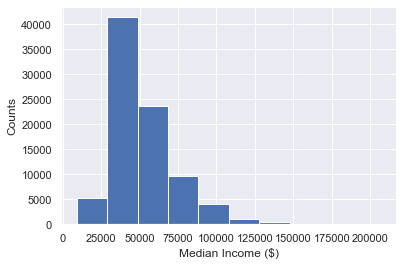

NormaltestResult(statistic=1367.2617785384066, pvalue=1.2672932794276132e-297)


In [38]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(median_us_income)
plt.xlabel('Median Income ($)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(median_us_income.sample(5000)))

In [39]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(median_us_income,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(median_us_income,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 438737542.43758744
The population standard deviation using the NumPy module is 20946.062695351302


In [40]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 31152.841 and 73044.966
Roughly 95% of the data is between 10206.778 and 93991.029
Roughly 99.7% of the data is between -10739.284 and 114937.092


In [41]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(median_us_income)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [-0.68695028 -0.68695028 -0.68695028 ...  1.90289206  1.90289206
  1.72448144]


In [42]:
# The problem: How do we know if any of the 5 treatments are statistically significant?
# The solution: ANOVA - are any of the treatment costs significantly different than the rest?
# Variables: treatment mosq - The number of mosquitoes caught in one hour (Per Man-Hour Mosquito Catch)

In [43]:
master_trim_df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Payment Year', 'Median Income'],
      dtype='object')

In [44]:
#Prep boxplot to compare average total payment
df1 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[0]]['Average Total Payments']
df2 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[1]]['Average Total Payments']
df3 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[2]]['Average Total Payments']
df4 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[3]]['Average Total Payments']
df5 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[4]]['Average Total Payments']
print(df1)

data = [df1, df2, df3, df4, df5] 
  
# Create the pandas DataFrame 
# df = pd.DataFrame(data, columns=filter_DRG) 
  
# # print dataframe. 
# df 

#---------------------------------
list_of_tuples = list(zip(df1, df2, df3, df4, df5))  
    
# Assign data to tuples.  
list_of_tuples   
  
  
# Converting lists of tuples into   
# pandas Dataframe.  
box_df = pd.DataFrame(list_of_tuples, columns = filter_DRG) 

63         11806.1
127        11906.2
203        11313.8
286        11404.9
372          13919
            ...   
1155062    14586.4
1155073      25031
1155075    20614.8
1155080    10525.1
1155085    11911.4
Name: Average Total Payments, Length: 17755, dtype: object


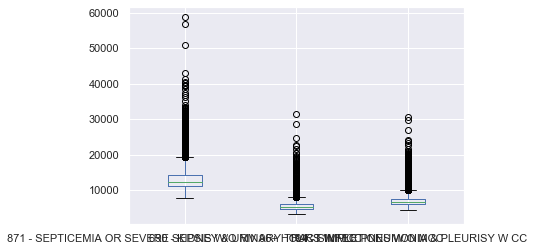

In [45]:
# Create a boxplot to compare procedure means by cost
proc_cost_compare = box_df.plot.box()

In [46]:
# master_trim_df.loc[master_trim_df['Average Total Payments'] == 8].index[0]


# Perform the ANOVA
#stats.f_oneway(df1, df2, df3, df3, df4, df5)

In [47]:
#Prep boxplot to compare procedures by income
income_df1 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[0]]['Median Income']
income_df2 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[1]]['Median Income']
income_df3 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[2]]['Median Income']
income_df4 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[3]]['Median Income']
income_df5 = master_trim_df.loc[master_trim_df['DRG Definition']==filter_DRG[4]]['Median Income']
print(income_df1)

data = [income_df1, income_df2, income_df3, income_df4, income_df5] 
  
# Create the pandas DataFrame 
# df = pd.DataFrame(data, columns=filter_DRG) 
  
# # print dataframe. 
# df 

#---------------------------------
list_of_tuples = list(zip(income_df1, income_df2, income_df3, income_df4, income_df5))  
    
# Assign data to tuples.  
list_of_tuples   
  
  
# Converting lists of tuples into   
# pandas Dataframe.  
box_df = pd.DataFrame(list_of_tuples, columns = filter_DRG) 

63         37710.0
127        32451.0
203        48141.0
286        64701.0
372        43147.0
            ...   
1155062    56488.0
1155073    57415.0
1155075    62747.0
1155080    91957.0
1155085    88220.0
Name: Median Income, Length: 17755, dtype: float64


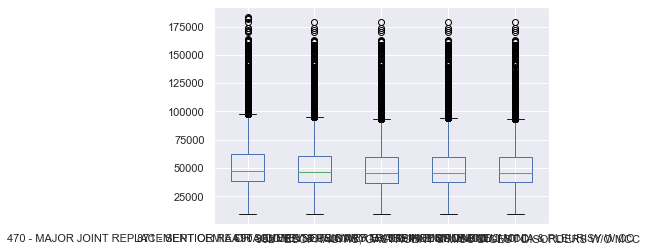

In [48]:
# Create a boxplot to compare means by income
proc_cost_compare = box_df.plot.box()

In [49]:
# Perform the ANOVA
stats.f_oneway(income_df1, income_df2, income_df3, income_df3, income_df4, income_df5)

F_onewayResult(statistic=33.81630190054903, pvalue=1.2241556883756161e-34)

In [50]:
# idx = np.where((df['Salary_in_1000']>=100) &amp; (df['Age']&lt; 60) &amp; (df['FT_Team'].str.startswith('S')))

procedure_names = [
    '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',\
    '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',\
    '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',\
    '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',\
    '194 - SIMPLE PNEUMONIA & PLEURISY W CC']


idx = np.where((final_data_df['DRG Definition']=='470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC') | \
               (final_data_df['DRG Definition']=='871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC') | \
               (final_data_df['DRG Definition']=='392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC') | \
               (final_data_df['DRG Definition']=='690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC') | \
               (final_data_df['DRG Definition']=='194 - SIMPLE PNEUMONIA & PLEURISY W CC') )

limit_df = final_data_df.loc[idx]
limit_df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Payment Year,Median Income
16,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,107.0,21096.9,5832.74,4615.95,2011,37710.0
57,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,156.0,20609.2,4370.31,2999.76,2011,37710.0
63,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,226.0,43444,11806.1,10298.4,2011,37710.0
78,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,64.0,20601.2,4385.94,3508.06,2011,37710.0
85,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,182.0,44643,11123.4,10400.5,2011,37710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155075,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,TX - San Antonio,69.0,95670,20614.8,18911.4,2017,62747.0
1155079,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,13.0,68832.3,4665.54,2987.77,2017,91957.0
1155080,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,17.0,102978,10525.1,9596.12,2017,91957.0
1155083,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,TX - El Paso,23.0,47396.7,4251.26,3450.22,2017,91957.0


In [51]:
#limit_df.to_csv('final_limit_data.csv', index=False)

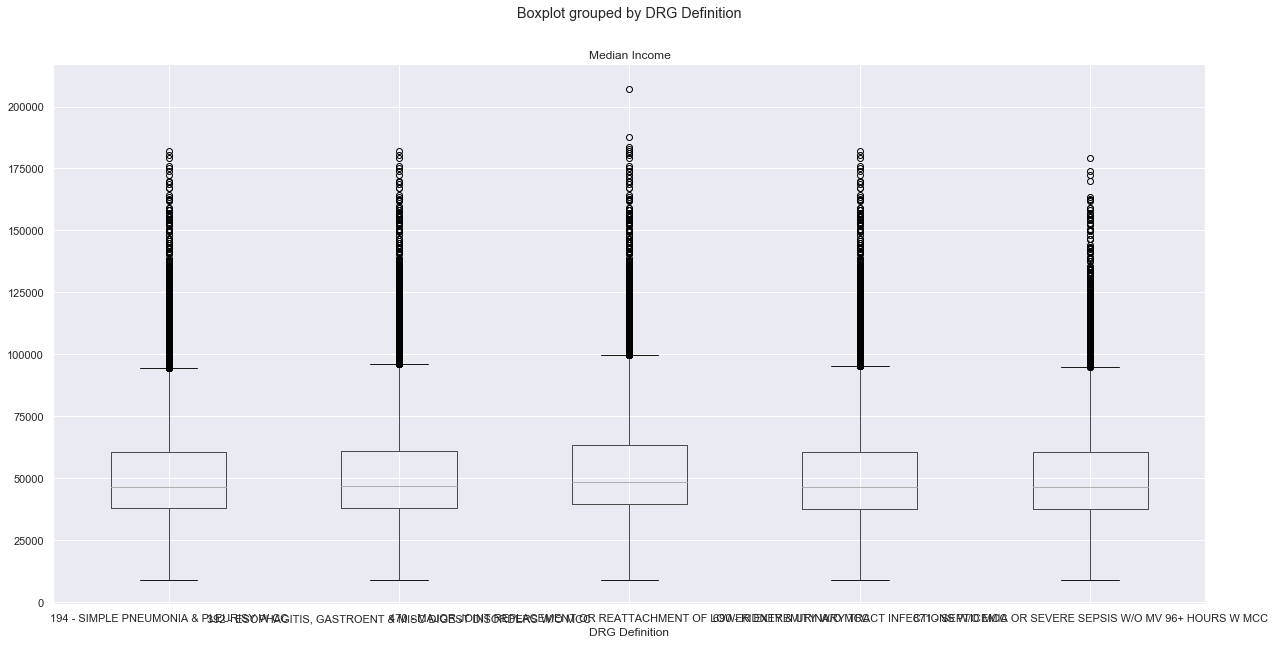

In [52]:
#Median income by procedure
limit_df.boxplot("Median Income", by="DRG Definition", figsize=(20, 10))

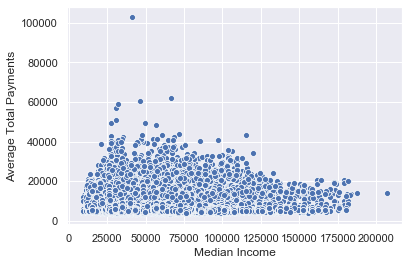

In [54]:
# Fixing random state for reproducibility
limit_df["Average Total Payments"] = limit_df["Average Total Payments"].replace({'\$': '', ',': ''}, regex=True).astype(float)

import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
ax = sns.scatterplot(y="Average Total Payments", x="Median Income", data=limit_df)

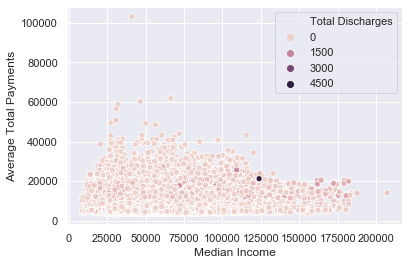

In [55]:

ax = sns.scatterplot(y="Average Total Payments", x="Median Income", hue="Total Discharges", data=limit_df)

ax = sns.scatterplot(y="Average Total Payments", x="Median Income", hue="Provider Zip Code", data=limit_df)

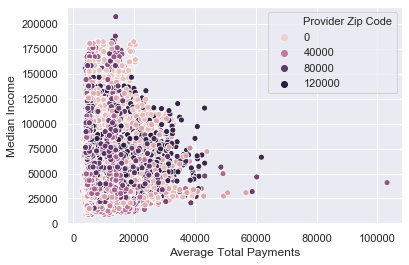

In [56]:
ax = sns.scatterplot(x="Average Total Payments", y="Median Income", hue="Provider Zip Code", data=limit_df)

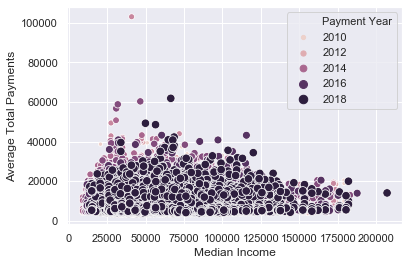

In [57]:
sns.scatterplot(y="Average Total Payments", x="Median Income", data=limit_df, hue="Payment Year",size="Payment Year")

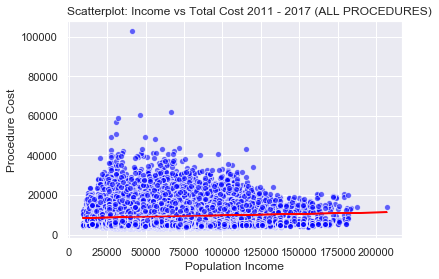

In [58]:
### Scatterplat Income vs Cost 2011 - 2017 (ALL PROCEDURES)
Y = limit_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = limit_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.scatter(X, Y, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(X, Y_pred, color='red')
plt.ylabel('Procedure Cost')
plt.xlabel('Population Income')
plt.title('Scatterplot: Income vs Total Cost 2011 - 2017 (ALL PROCEDURES)', loc='left')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()

In [59]:
#Create regretion table by year
idx = np.where(limit_df['Payment Year']==2011)
regress_2011 = limit_df.reindex(idx)
regress_2011

regress_2011 = np.where(limit_df['Payment Year']==2011)
regress_2012 = np.where(limit_df['Payment Year']==2012)
regress_2013 = np.where(limit_df['Payment Year']==2013)
regress_2014 = np.where(limit_df['Payment Year']==2014)
regress_2015 = np.where(limit_df['Payment Year']==2015)
regress_2016 = np.where(limit_df['Payment Year']==2016)
regress_2017 = np.where(limit_df['Payment Year']==2017)
regress_2017

(array([76106, 76107, 76108, ..., 85835, 85836, 85837], dtype=int64),)

In [60]:
print(procedure_names)

['470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC', '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC', '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC', '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC', '194 - SIMPLE PNEUMONIA & PLEURISY W CC']


In [61]:
#Create regretion table by procedure
columns = list(limit_df.columns)
# print(columns)
#  Create a new df for "US" with the columns. 
regress_470_df = limit_df.loc[limit_df["DRG Definition"] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',  columns]
regress_871_df = limit_df.loc[limit_df["DRG Definition"] == '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',  columns]
regress_392_df = limit_df.loc[limit_df["DRG Definition"] == '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',  columns]
regress_690_df = limit_df.loc[limit_df["DRG Definition"] == '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',  columns]
regress_194_df = limit_df.loc[limit_df["DRG Definition"] == '194 - SIMPLE PNEUMONIA & PLEURISY W CC',  columns]

regress_194_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Payment Year,Median Income
16,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,107.0,21096.9,5832.738318,4615.95,2011,37710.0
104,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,66.0,14732,6131.984848,4615.48,2011,32451.0
157,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,93.0,23711.2,5792.946237,4813.84,2011,48141.0
242,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,73.0,32653.9,5580.506849,4782.04,2011,64701.0
323,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,41.0,24682.3,6901.317073,5490.78,2011,43147.0


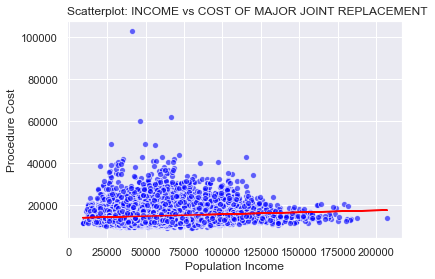

In [62]:
### Scatterplat Income vs Median Income 2011
Y = regress_470_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = regress_470_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(X, Y_pred, color='red')
plt.ylabel('Procedure Cost')
plt.xlabel('Population Income')
plt.title('Scatterplot: INCOME vs COST OF MAJOR JOINT REPLACEMENT', loc='left')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()

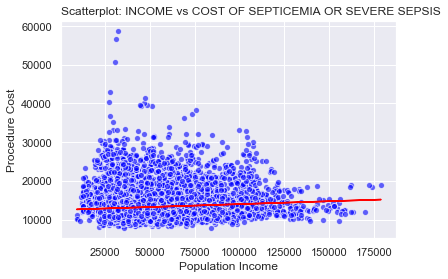

In [63]:
### Scatterplat Income vs Median Income 2012
Y = regress_871_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = regress_871_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(X, Y_pred, color='red')
plt.ylabel('Procedure Cost')
plt.xlabel('Population Income')
plt.title('Scatterplot: INCOME vs COST OF SEPTICEMIA OR SEVERE SEPSIS', loc='left')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()

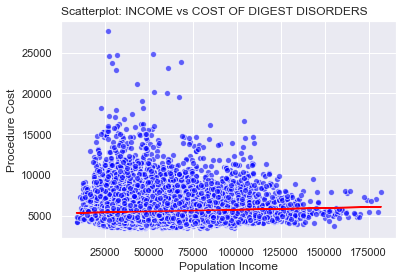

In [64]:
### Scatterplat Income vs Median Income 2013
Y = regress_392_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = regress_392_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(X, Y_pred, color='red')
plt.ylabel('Procedure Cost')
plt.xlabel('Population Income')
plt.title('Scatterplot: INCOME vs COST OF DIGEST DISORDERS', loc='left')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()

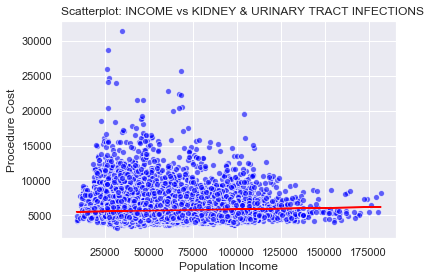

In [65]:
### Scatterplat Income vs Median Income 2014
Y = regress_690_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = regress_690_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(X, Y_pred, color='red')
plt.ylabel('Procedure Cost')
plt.xlabel('Population Income')
plt.title('Scatterplot: INCOME vs KIDNEY & URINARY TRACT INFECTIONS', loc='left')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()

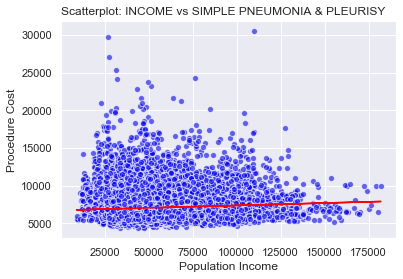

In [66]:
### Scatterplat Income vs Median Income 2015
Y = regress_194_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = regress_194_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color = "blue", alpha=0.6, edgecolors='white')
plt.plot(X, Y_pred, color='red')
plt.ylabel('Procedure Cost')
plt.xlabel('Population Income')
plt.title('Scatterplot: INCOME vs SIMPLE PNEUMONIA & PLEURISY', loc='left')
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.show()

In [67]:
limit_df.columns
print(procedure_names)

['470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC', '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC', '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC', '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC', '194 - SIMPLE PNEUMONIA & PLEURISY W CC']


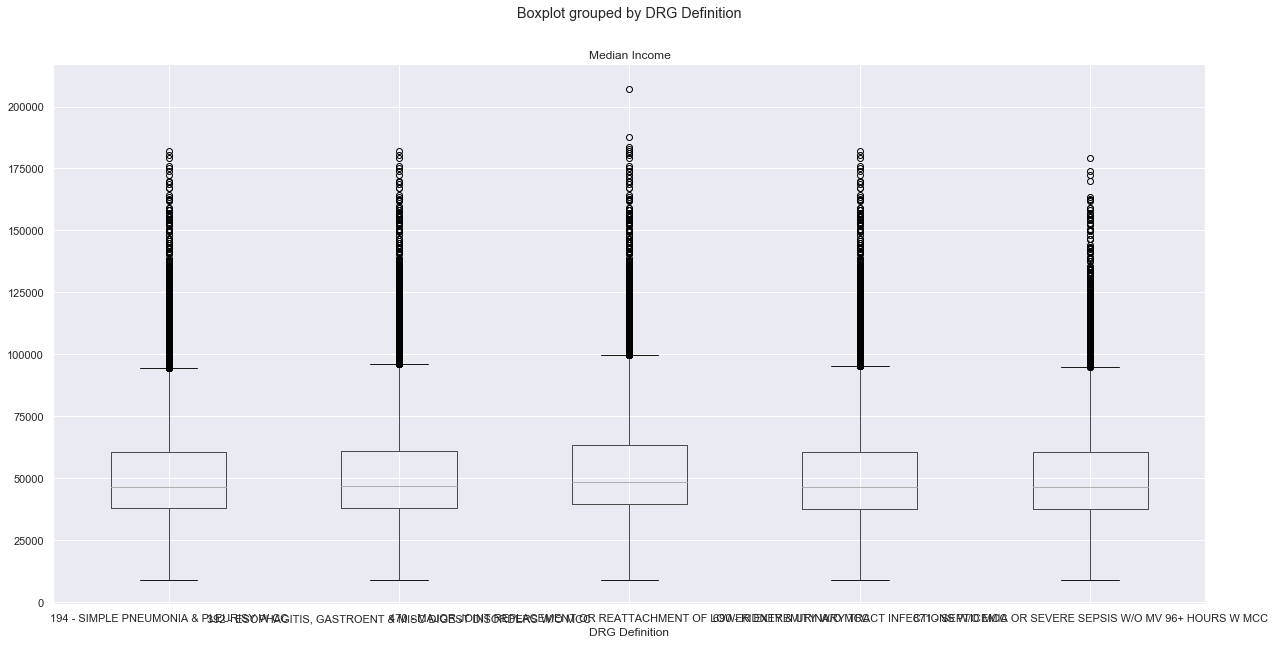

In [68]:
#correlation between procedure and income
limit_df.boxplot("Median Income", by="DRG Definition", figsize=(20, 10), labels=procedure_names)

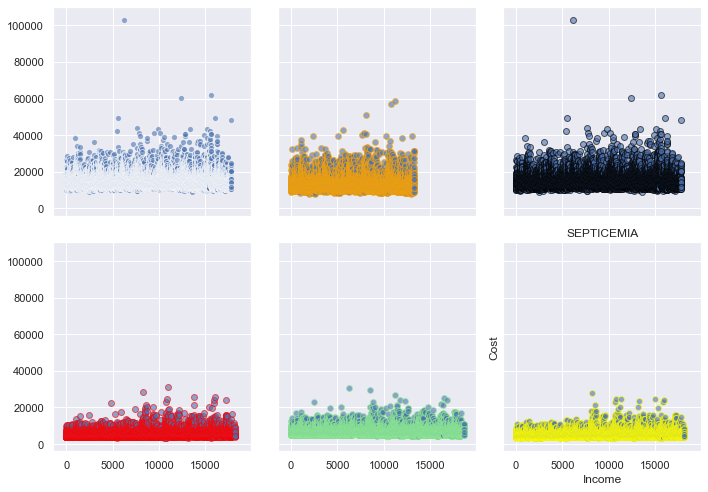

In [137]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,7))

Y = regress_470_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
X = regress_470_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

A = regress_871_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
B = regress_871_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

C = regress_690_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
D = regress_690_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

E = regress_194_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
F = regress_194_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

G = regress_392_df.iloc[:, 10].values.reshape(-1, 1)  # values converts it into a numpy array
H = regress_392_df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


# ax1.plot(X, Y, 'r', label='JOINT REPLACEMENT') # red
ax1.scatter(range(len(Y)), Y, label="population_cost", alpha=0.6, edgecolors='white')
plt.title("JOINT REPLACEMENT")
plt.xlabel("Income")
plt.ylabel("Cost");
#plt.legend();
plt.legend((procedure_names[0]), (procedure_names[0]), fontsize=5, ncol=1, framealpha=0, fancybox=True)

# ax2.plot(B, A, '--c', label='SEPTICEMIA') # dashed cyan
ax2.scatter(range(len(A)), A, label="population_cost", alpha=0.6, edgecolors='orange')
plt.title("SEPTICEMIA")
plt.xlabel("Income")
plt.ylabel("Cost");

# ax3.plot(D, C, '-g', label='sin(x)')  # solid green
ax3.scatter(range(len(Y)), Y, label="population_cost", alpha=0.6, edgecolors='black')
plt.xlabel("Income")
plt.ylabel("Cost");

# ax4.plot(F, E, 'k' , label='sin(x)')
ax4.scatter(range(len(C)), C, label="population_cost", alpha=0.6, edgecolors='red')
plt.xlabel("Income")
plt.ylabel("Cost");

# ax5.plot(H, G, '-.b', label='sin(x)') # dashdot black
ax5.scatter(range(len(E)), E, label="population_cost", alpha=0.6, edgecolors='lightgreen')
plt.xlabel("Income")
plt.ylabel("Cost");

# ax6.plot(range(10),'k', label='sin(x)')
ax6.scatter(range(len(G)), G, label="population_cost", alpha=0.6, edgecolors='yellow')
plt.xlabel("Income")
plt.ylabel("Cost");
plt.tight_layout()
plt.show()
    
# https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

In [126]:
####  TTest shows no significant difference between the means of sample and population data 
####  for MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY

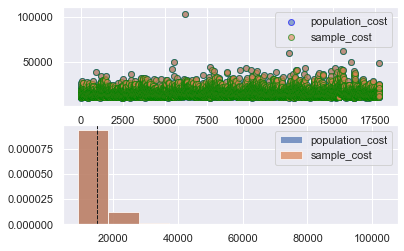

In [103]:
# Generate some data and show the scatter plot
population_470_df = final_data_df.loc[final_data_df["DRG Definition"] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',  columns]
population_cost = population_470_df["Average Total Payments"] 
sample_470_df = limit_df.loc[limit_df["DRG Definition"] == '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',  columns]
sample_cost = sample_470_df["Average Total Payments"] 

#uncomment and run if string error occurs
# final_data_df["Average Total Payments"] = final_data_df["Average Total Payments"].replace({'\$': '', ',': ''}, regex=True).astype(float)
#limit_df["Average Total Payments"] = limit_df["Average Total Payments"].replace({'\$': '', ',': ''}, regex=True).astype(float)
 
    
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population_cost)), population_cost, label="population_cost", alpha=0.6, edgecolors='blue')
plt.scatter(range(len(sample_cost)), sample_cost, label="sample_cost", alpha=0.6, edgecolors='green')
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population_cost, 10, density=True, alpha=0.7, label="population_cost")
plt.hist(sample_cost, 10, density=True, alpha=0.7, label="sample_cost")
plt.axvline(population_cost.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample_cost.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [77]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population_cost, sample_cost, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)